In [1]:
import tensorflow as tf 

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
from label_datagenerator import DataGenerator 

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255.0, test_images/255.0

MemoryError: Unable to allocate 1.14 GiB for an array with shape (50000, 32, 32, 3) and data type float64

<function matplotlib.pyplot.show(close=None, block=None)>

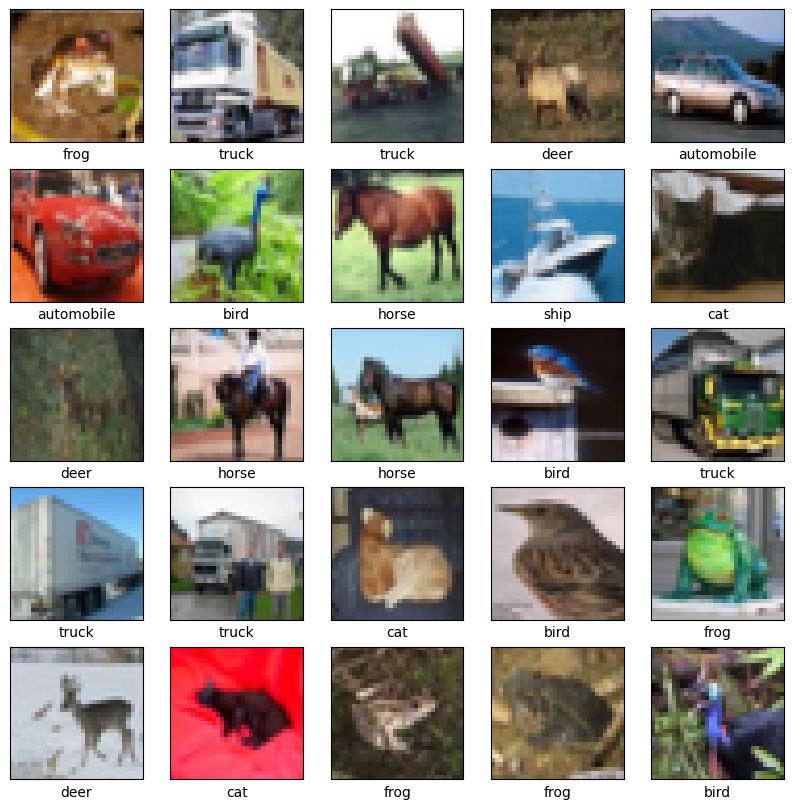

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

plt.show

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model.add(layers.Conv2DTranspose(32, (7, 7), activation = 'linear'))
model.add(layers.Conv2DTranspose(32, (7, 7), activation = 'linear'))
model.add(layers.Conv2DTranspose(32, (10, 10), activation = 'linear'))
model.add(layers.Conv2DTranspose(3, (8, 8), activation = 'linear'))



NameError: name 'models' is not defined

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 conv2d_transpose_32 (Conv2D  (None, 10, 10, 32)     

In [ ]:
model.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=['mae'])


history = model.fit(train_images, train_images, epochs=1,
                    validation_data=(test_images, test_images))

1563/1563 [==============================] - 191s 121ms/step - loss: 0.0179 - mae: 0.1006 - val_loss: 0.0176 - val_mae: 0.0998


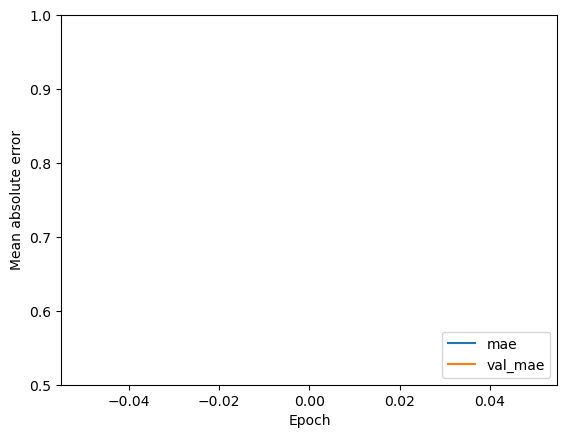

In [ ]:
plt.plot(history.history['mae'], label = 'mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
print(history.history['loss'])

[0.032296549528837204, 0.021584801375865936, 0.020343216136097908, 0.019694918766617775, 0.019128065556287766, 0.018725750967860222, 0.018420379608869553, 0.018292488530278206, 0.018064171075820923, 0.017964903265237808]


1/1 [==============================] - 0s 36ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


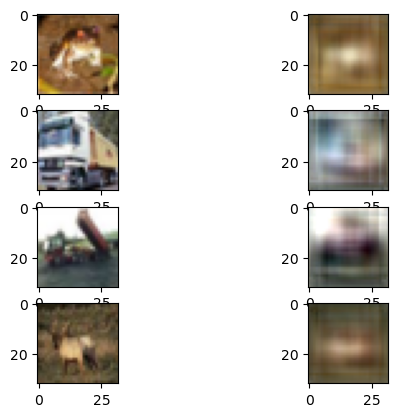

In [ ]:
y = model.predict(train_images[:4])

for i in range(4):
    plt.subplot(4,2,2*i+1)
    plt.imshow(train_images[i])
    plt.subplot(4,2,2*i+2)
    plt.imshow(y[i])

plt.show()
